# PAGERANK

## Latihan

Jumlah node: 10000
Jumlah edge: 78323

=== 5 NODE TERPENTING BERDASARKAN PAGERANK ===
1. Node 486980 -> PageRank = 0.006515
2. Node 285814 -> PageRank = 0.004633
3. Node 226374 -> PageRank = 0.003301
4. Node 163075 -> PageRank = 0.003288
5. Node 555924 -> PageRank = 0.002756


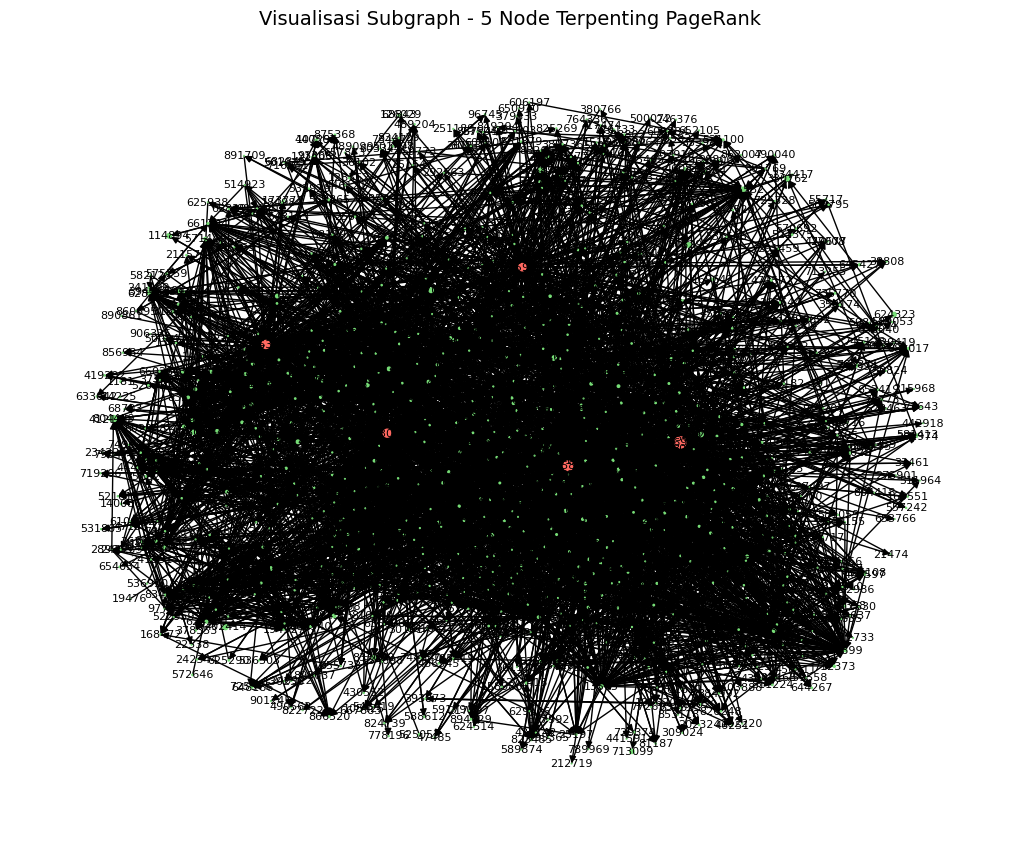

In [1]:
# ================================================================
# IMPLEMENTASI PAGERANK DENGAN VISUALISASI (Versi Google Colab)
# Dataset: web-Google_10k.txt
# ================================================================

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ============================================
# 1. Membaca File Edge List
# ============================================

file_path = "web-Google_10k.txt"  # ubah sesuai lokasi upload kamu di Colab
edges = []
with open(file_path, "r") as f:
    for line in f:
        if line.startswith("#") or not line.strip():
            continue
        u, v = map(int, line.split())
        edges.append((u, v))

# ============================================
# 2. Membangun Graph dan Menghitung PageRank
# ============================================

G = nx.DiGraph()
G.add_edges_from(edges)
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

# Hitung PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Ambil 5 node teratas berdasarkan nilai PageRank
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n=== 5 NODE TERPENTING BERDASARKAN PAGERANK ===")
for i, (node, score) in enumerate(top_nodes, start=1):
    print(f"{i}. Node {node} -> PageRank = {score:.6f}")

# ============================================
# 3. Visualisasi Subgraph dari Node Terpenting
# ============================================

# Ambil 5 node teratas dan semua tetangga (1-hop) untuk visualisasi
top_node_ids = [n for n, _ in top_nodes]
neighbors = set(top_node_ids)
for n in top_node_ids:
    neighbors.update(G.predecessors(n))
    neighbors.update(G.successors(n))

# Buat subgraph
subG = G.subgraph(neighbors).copy()

# Tentukan ukuran node berdasarkan nilai PageRank
sizes = [pagerank_scores.get(n, 0) * 10000 for n in subG.nodes()]
colors = ["#ff6961" if n in top_node_ids else "#77dd77" for n in subG.nodes()]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42, k=0.4)
nx.draw(
    subG,
    pos,
    with_labels=True,
    node_size=sizes,
    node_color=colors,
    font_size=8,
    arrowsize=10,
)
plt.title("Visualisasi Subgraph - 5 Node Terpenting PageRank", fontsize=14)
plt.show()


Jumlah node: 10000
Jumlah edge: 78323

=== 5 NODE TERPENTING BERDASARKAN PAGERANK ===
1. Node 486980 -> PageRank = 0.006515
2. Node 285814 -> PageRank = 0.004633
3. Node 226374 -> PageRank = 0.003301
4. Node 163075 -> PageRank = 0.003288
5. Node 555924 -> PageRank = 0.002756


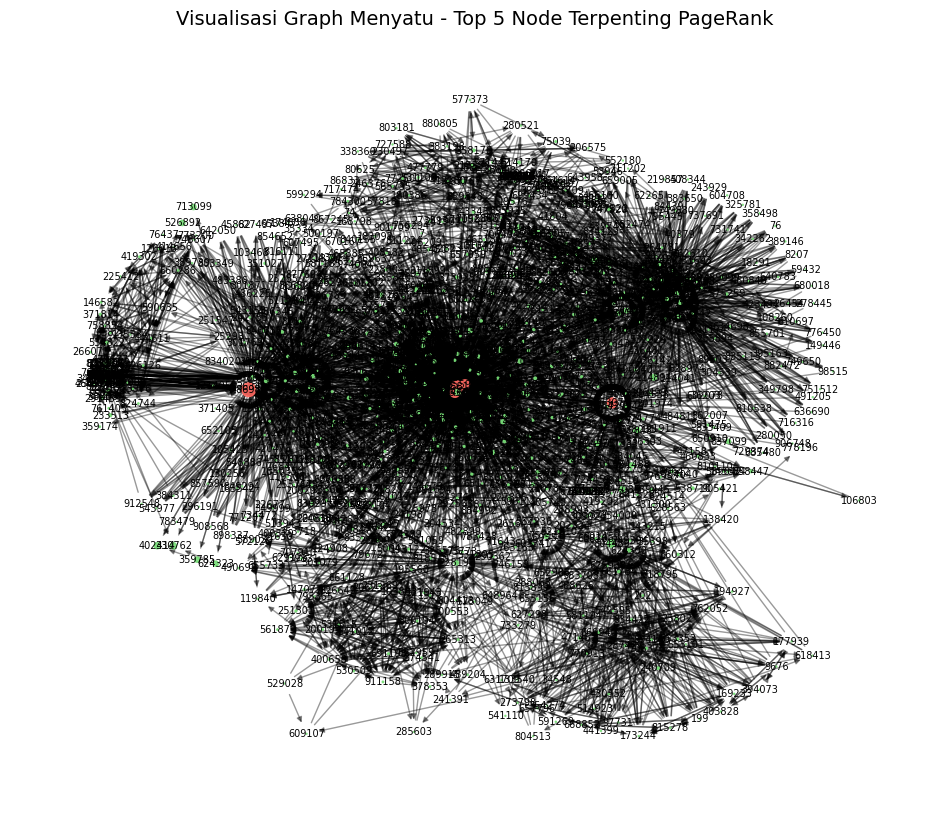

In [2]:
# ================================================================
# IMPLEMENTASI PAGERANK DENGAN VISUALISASI (Versi Graph Menyatu)
# ================================================================

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ============================================
# 1. Membaca File Edge List
# ============================================

file_path = "web-Google_10k.txt"
edges = []
with open(file_path, "r") as f:
    for line in f:
        if line.startswith("#") or not line.strip():
            continue
        u, v = map(int, line.split())
        edges.append((u, v))

# ============================================
# 2. Membangun Graph dan Menghitung PageRank
# ============================================

G = nx.DiGraph()
G.add_edges_from(edges)
print(f"Jumlah node: {G.number_of_nodes()}")
print(f"Jumlah edge: {G.number_of_edges()}")

# Hitung PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Ambil 5 node teratas berdasarkan nilai PageRank
top_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n=== 5 NODE TERPENTING BERDASARKAN PAGERANK ===")
for i, (node, score) in enumerate(top_nodes, start=1):
    print(f"{i}. Node {node} -> PageRank = {score:.6f}")

# ============================================
# 3. Visualisasi Graph Menyatu
# ============================================

# Ambil 5 node teratas dan semua tetangga (1-hop)
top_node_ids = [n for n, _ in top_nodes]
neighbors = set(top_node_ids)
for n in top_node_ids:
    neighbors.update(G.predecessors(n))
    neighbors.update(G.successors(n))

# Buat subgraph dari node penting dan tetangganya
subG = G.subgraph(neighbors).copy()

# Ukuran & warna node
sizes = [pagerank_scores.get(n, 0) * 15000 for n in subG.nodes()]
colors = ["#ff6961" if n in top_node_ids else "#77dd77" for n in subG.nodes()]

# Gunakan layout yang lebih "rapat dan menyatu"
plt.figure(figsize=(12, 10))
pos = nx.kamada_kawai_layout(subG)  # layout alami, tidak terpisah
nx.draw_networkx_nodes(subG, pos, node_size=sizes, node_color=colors, alpha=0.9)
nx.draw_networkx_edges(subG, pos, arrows=True, arrowstyle='-|>', arrowsize=8, alpha=0.4)
nx.draw_networkx_labels(subG, pos, font_size=7)

plt.title("Visualisasi Graph Menyatu - Top 5 Node Terpenting PageRank", fontsize=14)
plt.axis('off')
plt.show()


## Page Rank menggunakan data keluaran link teknik informatika

In [3]:
# BAGIAN 1: Import Library dan Baca File
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_name = 'semua_link_informatika2.csv'

try:
    # Baca file CSV tanpa header (diasumsikan 2 kolom: source & target)
    df = pd.read_csv(file_name, header=None)

    # Buat graf berarah dari dua kolom pertama
    G = nx.from_pandas_edgelist(
        df,
        source=0,
        target=1,
        create_using=nx.DiGraph()
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan. Pastikan file berada di dalam.")
except Exception as e:
    print(f"⚠️ Terjadi error saat membaca file: {e}")

✅ Berhasil membaca file: semua_link_informatika2.csv
Jumlah node: 1681
Jumlah edge: 1653


In [4]:
# BAGIAN 2: Periksa isi dataset dan jumlah edge
edges = pd.read_csv(
    file_name,
    comment="#",
    header=None,
    names=["FromNodeId", "ToNodeId"],
    engine="python",
    sep=None,               # auto deteksi delimiter
    on_bad_lines="skip"     # lewati baris rusak
)

edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])
print(f"Jumlah edges: {len(edges)}")
print(edges.head())

Jumlah edges: 1653
                              FromNodeId  \
﻿1  https://informatika.trunojoyo.ac.id/   
2   https://informatika.trunojoyo.ac.id/   
3   https://informatika.trunojoyo.ac.id/   
4   https://informatika.trunojoyo.ac.id/   
5   https://informatika.trunojoyo.ac.id/   

                                             ToNodeId  
﻿1               https://informatika.trunojoyo.ac.id/  
2   https://informatika.trunojoyo.ac.id/bidang-min...  
3   https://informatika.trunojoyo.ac.id/bidang-min...  
4   https://informatika.trunojoyo.ac.id/bidang-min...  
5   https://informatika.trunojoyo.ac.id/bidang-min...  


In [5]:
#  BAGIAN 3: Buat Graph dari edges
edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])

try:
    edges["FromNodeId"] = edges["FromNodeId"].astype(int)
    edges["ToNodeId"] = edges["ToNodeId"].astype(int)
except:
    pass  # kalau bukan angka, biarkan string

G = nx.DiGraph()
G.add_edges_from(edges[["FromNodeId", "ToNodeId"]].values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 130
Jumlah edge dalam graph: 1492


In [6]:
#  BAGIAN 4: Hitung PageRank dan cari node penting
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

pagerank_df = (
    pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"])
    .sort_values("PageRank", ascending=False)
    .reset_index(drop=True)
)

print("🏆 Top 5 Node dengan PageRank Tertinggi:")
print(pagerank_df.head(5))

🏆 Top 5 Node dengan PageRank Tertinggi:
                                                Node  PageRank
0               https://informatika.trunojoyo.ac.id/  0.010508
1  https://informatika.trunojoyo.ac.id/prestasi-m...  0.010508
2  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010508
3  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010508
4  https://informatika.trunojoyo.ac.id/unit-kegia...  0.010508


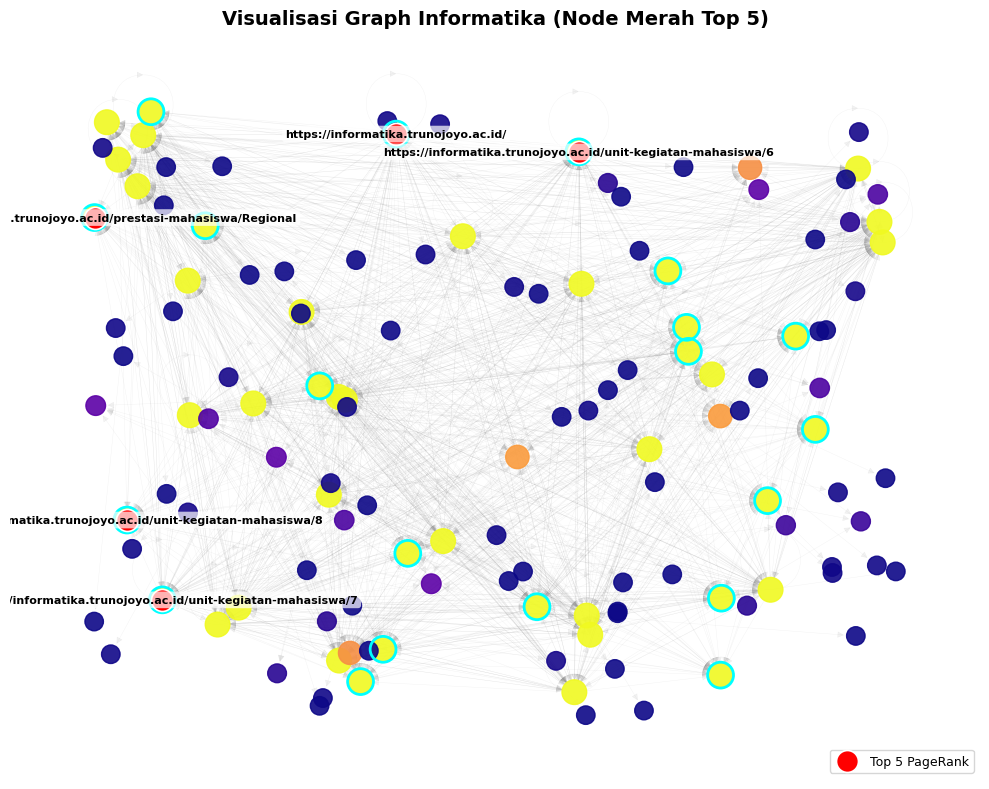

In [7]:
# CELL 5: Visualisasi Graph Informatika (Warna Cerah, Outline Kontras - Versi Ringkas)

import matplotlib.pyplot as plt
import networkx as nx

# Tutup figure sebelumnya jika masih aktif
plt.close('all')

# Ukuran figure lebih kecil
fig, ax = plt.subplots(figsize=(10, 8))

# Layout ringan tapi stabil
pos = nx.random_layout(G, seed=42)

# Warna node berdasarkan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]
node_sizes = [v * 30000 for v in pagerank.values()]  # sebelumnya 50000 → diperkecil

# Ambil Top 5 & Top 20 berdasarkan PageRank
top5_nodes = pagerank_df.head(5)["Node"].tolist()
top20_nodes = pagerank_df.head(20)["Node"].tolist()
top5_labels = {n: str(n) for n in top5_nodes}

# =========================
# Gambar Semua Node (Gradasi)
# =========================
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.9,
    ax=ax
)

# =========================
# Outline untuk Top 20 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top20_nodes,
    node_size=[pagerank[n]*33000 for n in top20_nodes],  # sebelumnya 55000
    node_color='none',
    edgecolors="#00FFFF",
    linewidths=2,
    ax=ax
)

# =========================
# Node Merah untuk Top 5 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    edgecolors="white",
    linewidths=1.2,
    node_size=250,  # sebelumnya 350
    label='Top 5 PageRank',
    ax=ax
)

# =========================
# Edge (transparan tipis)
# =========================
nx.draw_networkx_edges(
    G, pos,
    alpha=0.1,
    width=0.3,
    edge_color="gray",
    ax=ax
)

# =========================
# Label untuk Top 5 Node
# =========================
nx.draw_networkx_labels(
    G, pos,
    labels=top5_labels,
    font_color="black",
    font_size=8,
    font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"),
    ax=ax
)

# =========================
# Tampilan Akhir
# =========================
ax.set_title(
    "Visualisasi Graph Informatika (Node Merah Top 5)",
    fontsize=14, fontweight="bold", pad=10
)
ax.legend(scatterpoints=1, fontsize=9, loc="lower right")
ax.axis("off")

plt.tight_layout()
plt.show(block=True)
plt.close(fig)

## Page Rank Menggunakan Data Link Berita

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_name = 'tempo_links.csv'

try:
    # Baca file CSV tanpa header (diasumsikan 2 kolom: source & target)
    df = pd.read_csv(file_name, header=None)

    # Buat graf berarah dari dua kolom pertama
    G = nx.from_pandas_edgelist(
        df,
        source=0,
        target=1,
        create_using=nx.DiGraph()
    )

    print(f"✅ Berhasil membaca file: {file_name}")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"❌ File '{file_name}' tidak ditemukan. Pastikan file berada di dalam'.")
except Exception as e:
    print(f"⚠️ Terjadi error saat membaca file: {e}")

✅ Berhasil membaca file: tempo_links.csv
Jumlah node: 737
Jumlah edge: 701


In [18]:
edges = pd.read_csv(
    file_name,
    comment="#",
    header=None,
    names=["FromNodeId", "ToNodeId"],
    engine="python",
    sep=None,               # auto deteksi delimiter
    on_bad_lines="skip"     # lewati baris rusak
)

edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])
print(f"Jumlah edges: {len(edges)}")
print(edges.head())

Jumlah edges: 701
                                                   FromNodeId  \
﻿id_berita                                               page   
2070711     https://www.tempo.co/indeks?page=1&category=ru...   
2070710     https://www.tempo.co/indeks?page=1&category=ru...   
2070705     https://www.tempo.co/indeks?page=1&category=ru...   
2070701     https://www.tempo.co/indeks?page=1&category=ru...   

                                                     ToNodeId  
﻿id_berita                                        link_keluar  
2070711     https://www.tempo.co/politik/yusril-bilang-pra...  
2070710     https://www.tempo.co/politik/daftar-11-pejabat...  
2070705     https://www.tempo.co/politik/koalisi-sipil-bak...  
2070701     https://www.tempo.co/politik/wapres-gibran-tid...  


In [19]:
edges = edges.dropna(subset=["FromNodeId", "ToNodeId"])

try:
    edges["FromNodeId"] = edges["FromNodeId"].astype(str)
    edges["ToNodeId"] = edges["ToNodeId"].astype(str)
except:
    pass

# Buat graph berarah
G = nx.DiGraph()
G.add_edges_from(edges[["FromNodeId", "ToNodeId"]].values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 737
Jumlah edge dalam graph: 701


In [20]:
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

pagerank_df = (
    pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"])
    .sort_values("PageRank", ascending=False)
    .reset_index(drop=True)
)

print("🏆 Top 5 Node dengan PageRank Tertinggi:")
print(pagerank_df.head(5))

🏆 Top 5 Node dengan PageRank Tertinggi:
                                                Node  PageRank
0                                        link_keluar  0.002408
1  https://www.tempo.co/hiburan/profil-yu-menglon...  0.001358
2  https://www.tempo.co/internasional/kerugian-in...  0.001358
3  https://www.tempo.co/internasional/deretan-pej...  0.001358
4  https://www.tempo.co/internasional/arab-saudi-...  0.001358


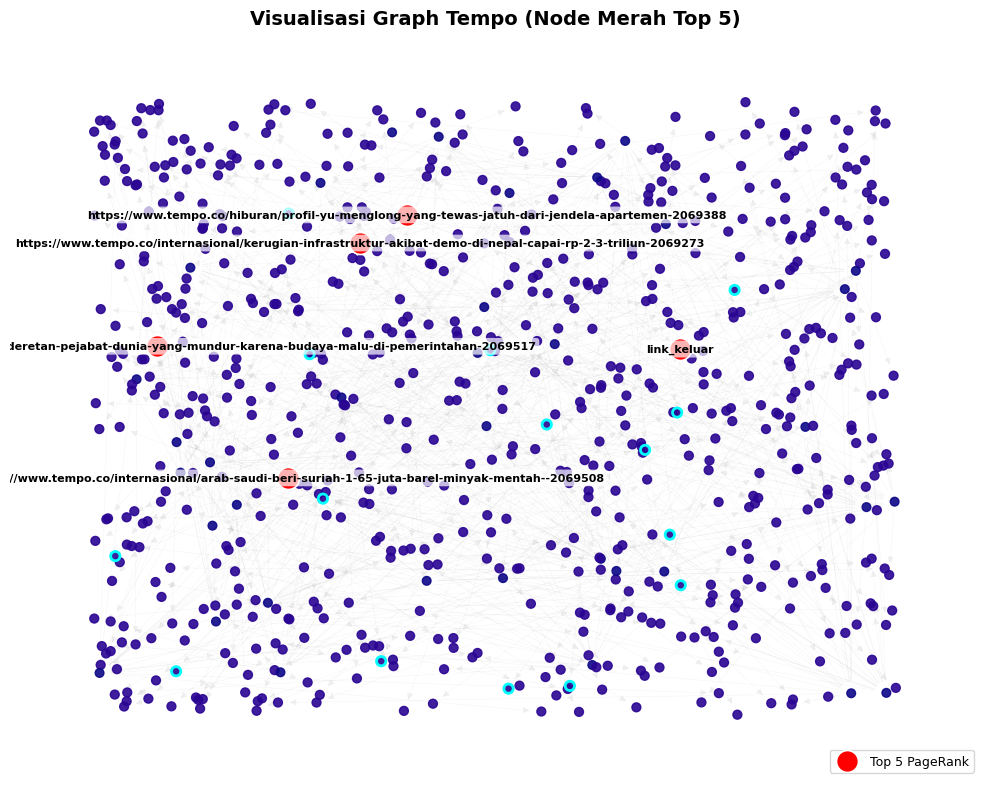

In [21]:
# CELL 5: Visualisasi Graph Informatika (Warna Cerah, Outline Kontras - Versi Ringkas)

import matplotlib.pyplot as plt
import networkx as nx

# Tutup figure sebelumnya jika masih aktif
plt.close('all')

# Ukuran figure lebih kecil
fig, ax = plt.subplots(figsize=(10, 8))

# Layout ringan tapi stabil
pos = nx.random_layout(G, seed=42)

# Warna node berdasarkan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]
node_sizes = [v * 30000 for v in pagerank.values()]  # sebelumnya 50000 → diperkecil

# Ambil Top 5 & Top 20 berdasarkan PageRank
top5_nodes = pagerank_df.head(5)["Node"].tolist()
top20_nodes = pagerank_df.head(20)["Node"].tolist()
top5_labels = {n: str(n) for n in top5_nodes}

# =========================
# Gambar Semua Node (Gradasi)
# =========================
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.9,
    ax=ax
)

# =========================
# Outline untuk Top 20 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top20_nodes,
    node_size=[pagerank[n]*33000 for n in top20_nodes],  # sebelumnya 55000
    node_color='none',
    edgecolors="#00FFFF",
    linewidths=2,
    ax=ax
)

# =========================
# Node Merah untuk Top 5 Node
# =========================
nx.draw_networkx_nodes(
    G, pos,
    nodelist=top5_nodes,
    node_color="red",
    edgecolors="white",
    linewidths=1.2,
    node_size=250,  # sebelumnya 350
    label='Top 5 PageRank',
    ax=ax
)

# =========================
# Edge (transparan tipis)
# =========================
nx.draw_networkx_edges(
    G, pos,
    alpha=0.1,
    width=0.3,
    edge_color="gray",
    ax=ax
)

# =========================
# Label untuk Top 5 Node
# =========================
nx.draw_networkx_labels(
    G, pos,
    labels=top5_labels,
    font_color="black",
    font_size=8,
    font_weight="bold",
    bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"),
    ax=ax
)

# =========================
# Tampilan Akhir
# =========================
ax.set_title(
    "Visualisasi Graph Tempo (Node Merah Top 5)",
    fontsize=14, fontweight="bold", pad=10
)
ax.legend(scatterpoints=1, fontsize=9, loc="lower right")
ax.axis("off")

plt.tight_layout()
plt.show(block=True)
plt.close(fig)